In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Yes_Bank_Train.csv')

In [25]:
df.head()

,serial number,account_info,duration_month,credit_history,purpose,credit_amount,savings_account,employment_st,poi,personal_status,...,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [26]:
df.describe()

,serial number,duration_month,credit_amount,poi,resident_since,age,credits_no,liables
count,800.0000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,3190.976250,2.966250,2.841250,35.406250,1.396250,1.147500
std,231.0844,12.15635,2732.671789,1.128806,1.106833,11.470317,0.569773,0.354825
min,1.0000,4.00000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,200.7500,12.00000,1342.250000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,400.5000,18.00000,2281.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,600.2500,24.00000,3914.250000,4.000000,4.000000,41.000000,2.000000,1.000000
max,800.0000,72.00000,15945.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
serial number       800 non-null int64
account_info        800 non-null object
duration_month      800 non-null int64
credit_history      800 non-null object
purpose             800 non-null object
credit_amount       800 non-null int64
savings_account     800 non-null object
employment_st       800 non-null object
poi                 800 non-null int64
personal_status     800 non-null object
gurantors           800 non-null object
resident_since      800 non-null int64
property_type       800 non-null object
age                 800 non-null int64
installment_type    800 non-null object
housing_type        800 non-null object
credits_no          800 non-null int64
job_type            800 non-null object
liables             800 non-null int64
telephone           800 non-null object
foreigner           800 non-null object
dtypes: int64(8), object(13)
memory usage: 131.3+ KB


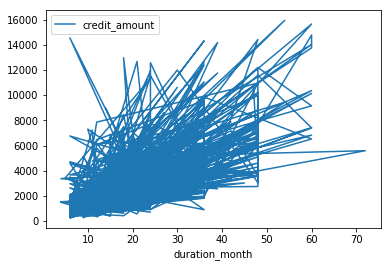

In [28]:
df.plot(x='duration_month',y='credit_amount')

In [29]:
df =df.drop(['serial number'],axis=1)

In [30]:
X = df.drop(['credit_amount'],axis=1)

In [31]:
y = df['credit_amount']

In [32]:
obj_col=X.select_dtypes(include='object')

In [33]:
obj_col = obj_col.columns.values
X = pd.get_dummies(X, columns=obj_col)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 60 columns):
duration_month           800 non-null int64
poi                      800 non-null int64
resident_since           800 non-null int64
age                      800 non-null int64
credits_no               800 non-null int64
liables                  800 non-null int64
account_info_A11         800 non-null uint8
account_info_A12         800 non-null uint8
account_info_A13         800 non-null uint8
account_info_A14         800 non-null uint8
credit_history_A30       800 non-null uint8
credit_history_A31       800 non-null uint8
credit_history_A32       800 non-null uint8
credit_history_A33       800 non-null uint8
credit_history_A34       800 non-null uint8
purpose_A40              800 non-null uint8
purpose_A41              800 non-null uint8
purpose_A410             800 non-null uint8
purpose_A42              800 non-null uint8
purpose_A43              800 non-null uint8
purpose_A44    

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree=1,
 learning_rate= 0.019,
 max_depth= 5,n_estimators=500,subsample=0.8)

In [37]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 2362.623974


In [39]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={
    'n_estimators':[1000],
    'max_depth':np.arange(2,11,1),
    'learning_rate':[0.01,0.1,0.05],
    'colsample_bytree':np.arange(0.1,1.1,0.1),
    'subsample':np.arange(0.5,1.0,0.1)
}
xg_reg = xgb.XGBRegressor(objective ='reg:linear',eval_metric='rmse')
gridser = GridSearchCV(xg_reg,params)
gridser.fit(X,y)

In [ ]:
gridser.best_params_

In [ ]:
gridser.best_score_

In [40]:
df2 = pd.read_csv('Yes_Bank_Test_int.csv')

In [41]:
df2 =df2.drop(['serial number'],axis=1)
X_t = df2
obj_col=X_t.select_dtypes(include='object')
obj_col = obj_col.columns.values
X_t = pd.get_dummies(X_t, columns=obj_col)

In [42]:
X_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 60 columns):
duration_month           200 non-null int64
poi                      200 non-null int64
resident_since           200 non-null int64
age                      200 non-null int64
credits_no               200 non-null int64
liables                  200 non-null int64
account_info_A11         200 non-null uint8
account_info_A12         200 non-null uint8
account_info_A13         200 non-null uint8
account_info_A14         200 non-null uint8
credit_history_A30       200 non-null uint8
credit_history_A31       200 non-null uint8
credit_history_A32       200 non-null uint8
credit_history_A33       200 non-null uint8
credit_history_A34       200 non-null uint8
purpose_A40              200 non-null uint8
purpose_A41              200 non-null uint8
purpose_A410             200 non-null uint8
purpose_A42              200 non-null uint8
purpose_A43              200 non-null uint8
purpose_A44    

In [43]:
finalpred = xg_reg.predict(X_t)

In [44]:
_ = pd.read_csv('Yes_Bank_Test_int.csv')

In [45]:
serial = _['serial number']
data = { 'serial number': serial, 'credit_amount': finalpred}
submission = pd.DataFrame(data)
submission.head()

,serial number,credit_amount
0,1,2062.784180
1,2,2373.718994
2,3,3509.539551
3,4,1478.231934
4,5,1763.116089


In [ ]:
submission.to_csv('xgb5.csv',index=False)